# CAPM - Capital Asset Pricing Model 

Watch the video for the full overview.

Portfolio Returns:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Market Weights:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $


### CAPM of a portfolio


## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [1]:
# Model CAPM as a simple linear regression

In [2]:
from scipy import stats

In [3]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero.
    stderr : float
        Standard error of the estimated gradient.
    
    See also
    --------
    :func:`scipy.optimize.curve_fit` : Use 

In [4]:
import pandas as pd

In [5]:
import pandas_datareader as web

In [6]:
spy_etf = web.DataReader('SPY', 'google')

In [7]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-09-19 to 2017-09-15
Data columns (total 5 columns):
Open      250 non-null float64
High      250 non-null float64
Low       250 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [8]:
spy_etf.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-09-19,214.13,214.88,213.03,213.41,80250490
2016-09-20,214.41,214.59,213.38,213.42,69665279
2016-09-21,214.24,216.03,213.44,215.82,110284425
2016-09-22,217.00,217.53,216.71,217.18,76678713
2016-09-23,216.72,216.88,215.88,215.99,73630921


In [9]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-18')

In [10]:
aapl = web.DataReader('AAPL', 'google', start, end)

In [11]:
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-09-19,115.19,116.18,113.25,113.58,47023046
2016-09-20,113.05,114.12,112.51,113.57,34514269
2016-09-21,113.85,113.99,112.44,113.55,36003185
2016-09-22,114.35,114.94,114.00,114.62,31073984
2016-09-23,114.42,114.79,111.55,112.71,52481151


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

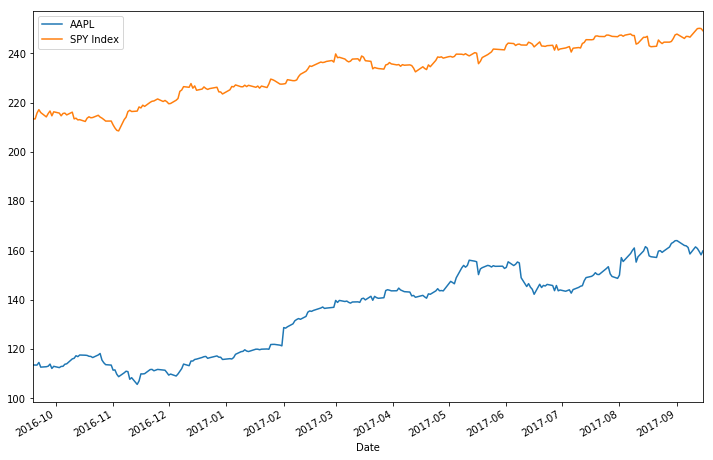

In [13]:
aapl['Close'].plot(label = 'AAPL',
                   figsize = (12, 8))
spy_etf['Close'].plot(label = 'SPY Index')
plt.legend()

## Compare Cumulative Return

In [14]:
aapl['Cumulative'] = aapl['Close'] / aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close'] / spy_etf['Close'].iloc[0]

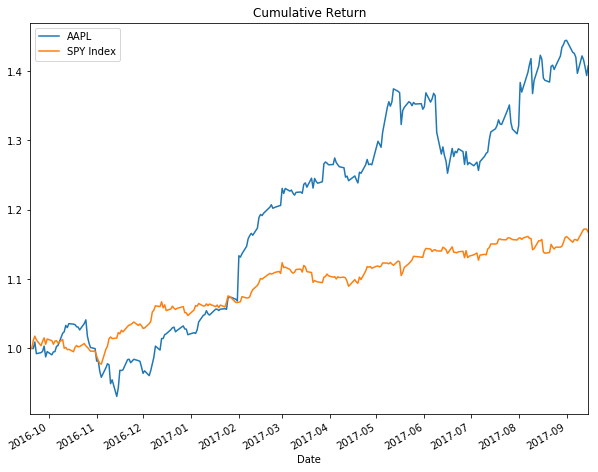

In [15]:
aapl['Cumulative'].plot(label = 'AAPL',
                        figsize = (10,8))
spy_etf['Cumulative'].plot(label = 'SPY Index')
plt.legend()
plt.title('Cumulative Return')

## Get Daily Return

In [16]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

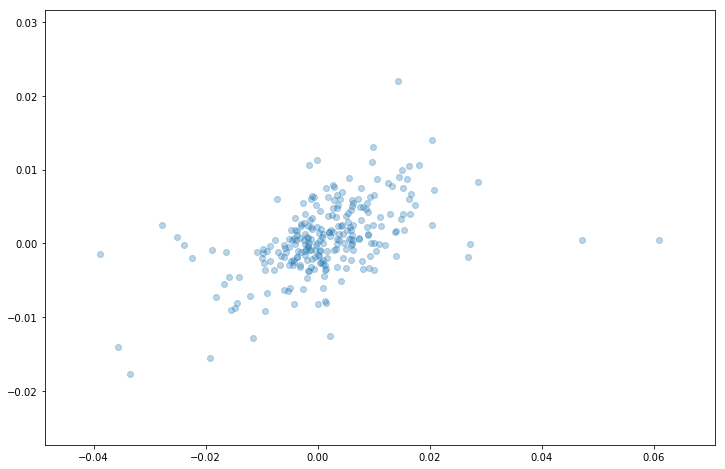

In [17]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(aapl['Daily Return'], spy_etf['Daily Return'],
            alpha = 0.3)

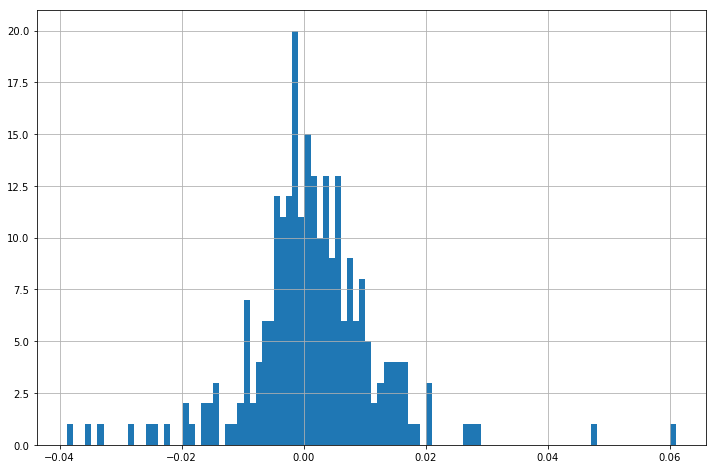

In [18]:
aapl['Daily Return'].hist(bins = 100, figsize = (12, 8))

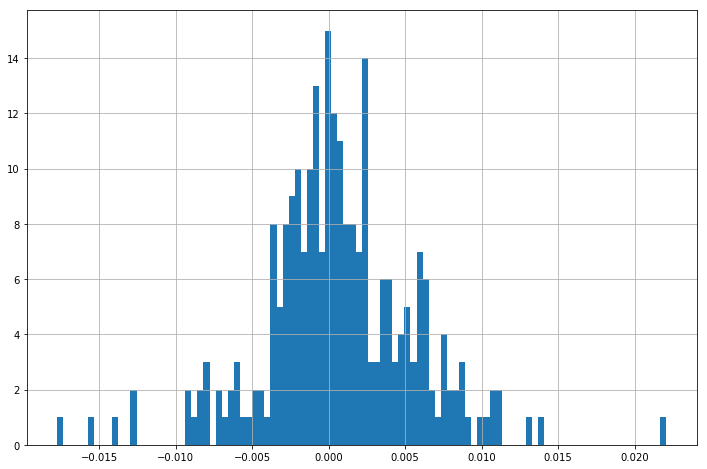

In [19]:
spy_etf['Daily Return'].hist(bins = 100, figsize = (12, 8))

In [20]:
beta,alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [21]:
beta

0.228906597120866

In [22]:
alpha

0.00030597213336046542

In [23]:
r_value

0.49738282104700338

## What if our stock was completely related to SP500?

In [24]:
spy_etf['Daily Return'].head()

Date
2016-09-19         NaN
2016-09-20    0.000047
2016-09-21    0.011245
2016-09-22    0.006302
2016-09-23   -0.005479
Name: Daily Return, dtype: float64

In [25]:
import numpy as np

In [26]:
noise = np.random.normal(0, 0.001, len(spy_etf['Daily Return'].iloc[1:]))

In [27]:
noise

array([ -9.78836991e-05,   1.87674266e-04,  -1.99297712e-03,
        -2.61085893e-04,  -4.19135719e-04,  -1.12214385e-04,
        -1.54329803e-03,  -1.77263961e-04,  -1.03146392e-03,
        -2.17750196e-04,  -2.90126796e-05,   6.29873945e-06,
         6.72558435e-04,  -4.07485050e-04,   4.79680635e-04,
        -2.44509201e-03,  -2.88638120e-03,  -6.50990483e-04,
        -9.69376951e-04,   9.03761267e-04,   6.70812127e-04,
        -3.82394046e-04,   1.06799514e-03,  -5.72159450e-04,
         3.64957195e-04,   5.27049117e-04,   1.88525365e-04,
         1.25234304e-03,  -5.36604480e-04,   1.67152587e-03,
         5.99922284e-04,  -7.74024912e-04,  -1.78823452e-03,
         1.13993056e-03,   7.37033162e-05,  -8.26086282e-04,
         1.33928679e-04,   7.28833775e-04,   3.08134295e-04,
         1.74955758e-04,   8.49098409e-04,   2.23561400e-04,
        -4.13513006e-04,  -4.69609505e-04,  -1.60696522e-04,
        -4.75829596e-04,  -1.11199267e-03,   1.18648768e-03,
        -2.24434105e-04,

In [28]:
spy_etf['Daily Return'].iloc[1:] + noise

Date
2016-09-20   -0.000051
2016-09-21    0.011433
2016-09-22    0.004309
2016-09-23   -0.005740
2016-09-26   -0.008521
2016-09-27    0.006096
2016-09-28    0.003420
2016-09-29   -0.009225
2016-09-30    0.006515
2016-10-03   -0.002622
2016-10-04   -0.005127
2016-10-05    0.004431
2016-10-06    0.001368
2016-10-07   -0.003837
2016-10-10    0.005688
2016-10-11   -0.015075
2016-10-12   -0.001574
2016-10-13   -0.003926
2016-10-14   -0.000453
2016-10-17   -0.002568
2016-10-18    0.006933
2016-10-19    0.002285
2016-10-20   -0.000799
2016-10-21   -0.000105
2016-10-24    0.004618
2016-10-25   -0.002824
2016-10-26   -0.001819
2016-10-27   -0.001414
2016-10-28   -0.003492
2016-10-31    0.001719
                ...   
2017-08-04    0.001530
2017-08-07    0.003421
2017-08-08   -0.003048
2017-08-09   -0.000257
2017-08-10   -0.014710
2017-08-11   -0.000035
2017-08-14    0.011171
2017-08-15   -0.000835
2017-08-16    0.002546
2017-08-17   -0.015494
2017-08-18   -0.001903
2017-08-21    0.000955
2017-0

In [29]:
beta, alpha, r_value, p_value, std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise,
                                                      spy_etf['Daily Return'].iloc[1:])

In [30]:
beta

0.95682599662142187

In [31]:
alpha

7.8117879583955419e-05

Looks like our understanding is correct!